##A importância de aplicar limpeza de dados antes de usar algoritmos de predição


---
A limpeza de dados é uma etapa crucial em qualquer processo de análise de dados, especialmente quando se trata de algoritmos de predição. Os algoritmos de predição são projetados para encontrar padrões nos dados para fazer previsões precisas sobre o futuro. No entanto, se os dados de entrada contiverem erros, informações incompletas ou inconsistências, isso pode afetar significativamente a precisão das previsões.


Por isso, é importante aplicar a limpeza de dados antes de utilizar qualquer algoritmo de predição. A limpeza de dados envolve identificar e corrigir erros e inconsistências nos dados, como dados ausentes, valores duplicados, erros de digitação, entre outros.


---



Um exemplo de conjunto de dados no Kaggle que requer limpeza é o conjunto de dados **Titanic: Machine Learning from Disaster**. Esse conjunto de dados contém valores nulos em várias variáveis, incluindo "Age", "Cabin" e "Embarked". Para lidar com esses valores ausentes, podemos usar algumas técnicas. E esses dados precisam ser tratados antes de serem usados em um modelo de aprendizado de máquina.

Vamos começar importando esses dados:

In [60]:
#
import pandas as pd
url='https://drive.google.com/file/d/1L4jLI-AiMGh7mULUS6rVwA3K-LmNpdHS/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,sep=',')

In [61]:
# visualização dos dados
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Podemos preencher os valores ausentes com a média dos valores existentes. Por exemplo, a variável **Age** tem alguns valores ausentes, podemos preencher esses valores com a média das idades existentes.

In [64]:
age_mean = df['Age'].mean()
df['Age'].fillna(age_mean, inplace=True)

Agora vamos aplicar para as outras variáveis, nesse caso são **Cabin** e **Embarked** quem ainda cntém valores nulos.

In [65]:
df['Cabin'].fillna("Unknown", inplace=True)
df['Embarked'].fillna("Unknown", inplace=True)

Identificar e lidar com outliers


---
Para lidar com outliers no conjunto de dados **Titanic: Machine Learning from Disaster**, podemos seguir algumas abordagens. Segue exemplo abaixo:


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
import numpy as np

Para lidar com outliers no conjunto de dados Titanic: Machine Learning from Disaster, podemos seguir algumas abordagens comuns. Vou dar um exemplo de como lidar com outliers na variável **Age**.

Para saber se a exclusão de outliers foi aplicada corretamente, podemos comparar a distribuição da variável antes e depois da exclusão.

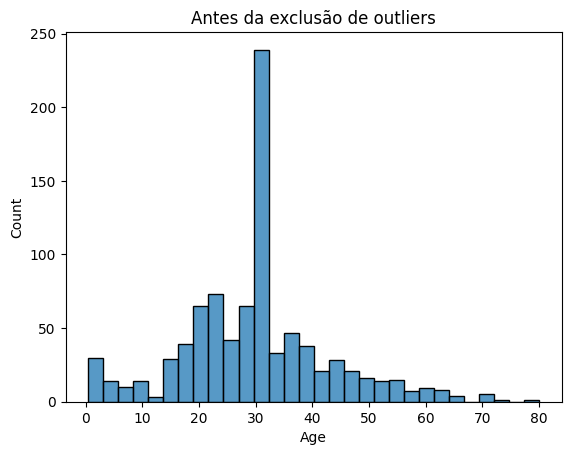

In [68]:
# distribuição da variável "Age" antes da exclusão
sns.histplot(data=df, x='Age')
plt.title('Antes da exclusão de outliers')
plt.show()

Essa função pode ser usada para excluir outliers de um DataFrame. A função calcula o intervalo de valores que estão dentro de 2,7 desvios padrão da média e define como NaN (valor faltante) os valores que estão fora desse intervalo.

In [69]:
def outliers(DataFrame, col_name):
  interval = 2.7*DataFrame[col_name].std()
  media = DataFrame[col_name].mean()
  DataFrame.loc[df[col_name] < (media - interval), col_name] = np.nan
  DataFrame.loc[df[col_name] > (media + interval), col_name] = np.nan

In [70]:
outliers(df, 'Age')

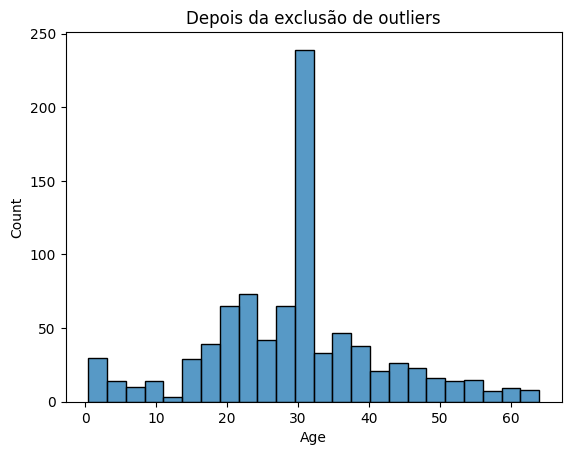

In [71]:
# distribuição da variável "Age" depois da exclusão
sns.histplot(data=df, x='Age')
plt.title('Depois da exclusão de outliers')
plt.show()

A normalização de dados é uma etapa importante em muitos algoritmos de aprendizado de máquina, pois ajuda a colocar todas as variáveis em uma escala comum e a melhorar o desempenho do modelo. Existem várias técnicas de normalização de dados, mas uma das mais comuns é a normalização Min-Max.


---
Nesse exemplo, uma nova coluna chamada **Age_norm**, que contém os valores normalizados da coluna **Age**. A função apply é usada para aplicar a fórmula de normalização em cada valor da coluna **Age**.


In [72]:
# encontrrar o valor minimo e maximo da coluna "Age"
age_min = df['Age'].min()
age_max = df['Age'].max()

# aplicar a normalização Min-Max na coluna "Age"
df['Age_norm'] = df['Age'].apply(lambda x: (x - age_min) / (age_max - age_min))

O tratamento de dados categóricos é uma etapa importante em muitos algoritmos de aprendizado de máquina. Existem várias técnicas para lidar com variáveis categóricas, como a codificação one-hot, a codificação ordinal e a codificação de frequência.

A codificação one-hot é a técnica mais comum para lidar com variáveis categóricas. Essa técnica transforma cada categoria em uma nova coluna binária (0 ou 1), indicando a presença ou ausência da categoria em cada registro. Podemos usar a função get_dummies do pandas para aplicar a codificação one-hot em uma ou mais colunas categóricas.

Temos a coluna chamada **Sex**. Podemos aplicar a codificação one-hot da seguinte forma:

In [73]:
df_onehot = pd.get_dummies(df, columns=['Sex'])

A função retorna um novo DataFrame chamado df_onehot, que contém as novas colunas binárias geradas pela codificação one-hot.

In [74]:
df_onehot.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_norm,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,S,0.339415,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0.591066,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,0.402328,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0.543882,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,S,0.543882,0,1


##Conclusão

---



Durante este artigo, abordamos alguns aspectos para uma limpeza de dados. No entanto, é importante ressaltar que cada conjunto de dados possui suas peculiaridades e uma abordagem de limpeza que funciona bem para um conjunto de dados pode não ser adequada para outro.

A limpeza de dados também pode envolver a normalização dos dados para garantir que eles estejam em uma escala semelhante, o que pode melhorar a precisão dos algoritmos de predição. Além disso, a limpeza de dados pode envolver a remoção de dados irrelevantes ou redundantes que podem afetar negativamente a precisão das previsões.

Ao aplicar a limpeza de dados, é possível melhorar a qualidade dos dados de entrada para os algoritmos de predição, o que pode levar a previsões mais precisas e confiáveis. Isso é especialmente importante em áreas como a medicina, finanças e negócios, onde decisões baseadas em previsões precisas podem ter um impacto significativo.